In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objects as go
sns.set()

In [2]:
from wordcloud import WordCloud, STOPWORDS

In [3]:
"""Regular stop words"""
stopwords = set(STOPWORDS)
stopwords.add("ein")

stop_add = ["ein","im","von","mit","bei","dem","aber","hat", "und"]
for i in stop_add:
    stopwords.add(i)

In [4]:
"""German stop words"""
from stop_words import get_stop_words

stop_words = get_stop_words('de')

ModuleNotFoundError: No module named 'stop_words'

In [5]:
"""Read data"""
df = pd.read_excel("Test_data.xlsx")
string = df.to_string()

In [15]:
df.head(20)

,Statements
0,Milk production takes place in all EU countrie...
1,The EU dairy herd has been decreasing in recen...
2,"Farm and dairy herd sizes vary enormously, as ..."
3,Market intervention
4,The EU uses a number of mechanisms to protect ...
5,Public intervention
6,Public intervention consists of the buying up ...
7,"Between 1 March and 30 September each year, a ..."
8,Public intervention stocks are sold back on th...
9,The paying agencies of EU countries are respon...


In [7]:
"""Pick fancy black-white image and mask your damn word cloud"""
mask = np.array(Image.open("Cloud_stock.png"))

##### WordCloud with specific frequencies

In [8]:
"""Use this WordCloud in case you want to keep specific statements together (as WordCloud tends to split them otherwise) 
and go for specific frequencies per data set. Be aware, that your input per line shouldn't be too long."""
counts = df['Statements'].value_counts()
counts.index = counts.index.map(str)

q5 = WordCloud(
    background_color='white', 
    mask=mask,
    max_words=2000,
    stopwords=stopwords,
    width=2000,
    height=1400).generate_from_frequencies(counts)

##### WordCloud without specific frequencies

In [ ]:
q5 = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    mask=mask,
    width=1200,
    height=600)

q5.generate(string)

In [9]:
"""Recolor cloud based on preference. 
Look at matplotlib color maps for further options, if necessary."""
q5.recolor(colormap='viridis')

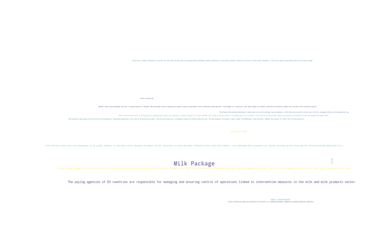

In [10]:
plt.imshow(q5, interpolation='bilinear')
plt.axis('off')
plt.show()

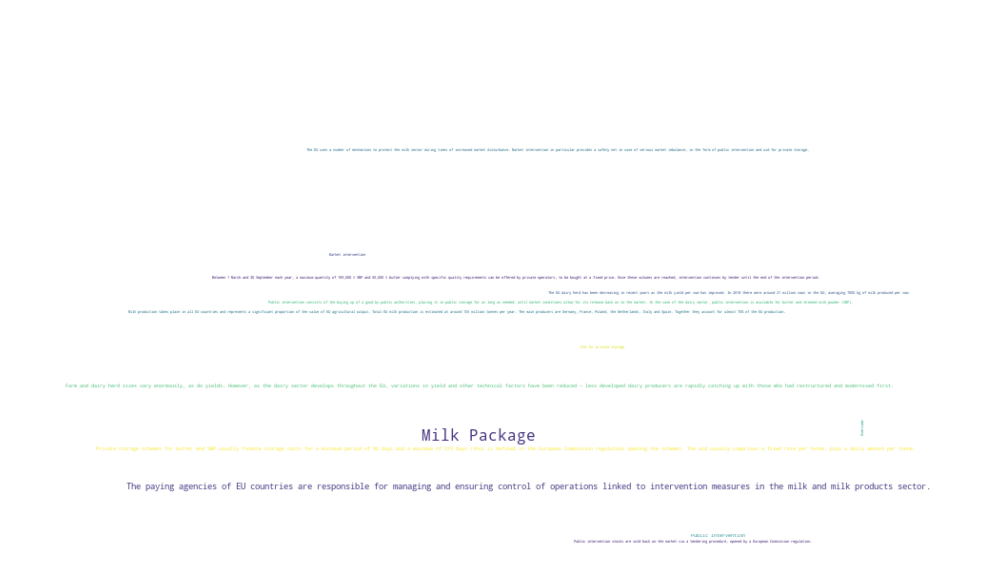

In [11]:
"Time to resize!"
fig = plt.figure()
fig.set_figwidth(30) # set width
fig.set_figheight(10) # set height

# display the cloud
plt.imshow(q5, interpolation='bilinear')
plt.axis('off')
plt.show()